## Baseline Model - Classification

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

plt.style.use('classic')

In [2]:
# load the previously created data set for the ST4000DM000, where columns with all null values 
# or columns with a std of 0 have been removed and the countdown column has already been created
classification_data = pd.read_csv('../data/special_purpose/ST4000DM000_processed_relevant.csv')

In [3]:
# create a new column based on the countdown which will be adjusted to serve a 
# classification purpose of "will fail within 30 days" or "will not fail within 30 days"
classification_data['fail_30'] = classification_data['countdown']

# function to adjust the previously created "fail_30" column and transform the data into a binary classification problem (e.g "will fail within 30 days" or "will not fail within 30 days"")
def classification_target(cols):
    """function to adjust the previously created "fail_30" column and transform data based on the previous data into 0 or 1
    if value is <= 30, the value is transformed into 1
    if value is > 30, the value is transformed into 0

    Args:
        cols: takes as an argument the panads column specified before the apply method

    Returns:
        int: 0 or 1 based on the previous information
    """
    classification = cols[0]

    if classification <= 30:
        return 1
    if classification > 30:
        return 0

# apply the created function using the .appy method
classification_data['fail_30'] = classification_data[['countdown']].apply(classification_target, axis=1)

In [ ]:
# create a new column based on the countdown which will be adjusted to serve a 
# classification purpose of "will fail within 30 days" or "will not fail within 30 days"
classification_data['fail_30'] = classification_data['countdown']

# function to adjust the previously created "fail_30" column and transform the data into a binary classification problem (e.g "will fail within 30 days" or "will not fail within 30 days"")
def classification_target(cols):
    """function to adjust the previously created "fail_30" column and transform data based on the previous data into 0 or 1
    if value is <= 30, the value is transformed into 1
    if value is > 30, the value is transformed into 0

    Args:
        cols: takes as an argument the panads column specified before the apply method

    Returns:
        int: 0 or 1 based on the previous information
    """
    classification = cols[0]

    if classification <= 30:
        return 1
    if classification > 30:
        return 0

# apply the created function using the .appy method
classification_data['fail_30'] = classification_data[['countdown']].apply(classification_target, axis=1)

In [4]:
# create a helper list containing only the smart features which have been deemed relevant within the EDA (5, 183, 184, 187)
columns = ['fail_30']

for col in classification_data.columns:
    if '5' in col or '183' in col or '184' in col or '187' in col:
        columns.append(col)

In [5]:
# look at the descriptive statistics for failing observations
classification_data[classification_data['fail_30'] == 1][columns].describe().T

,count,mean,std,min,25%,50%,75%,max
fail_30,18367.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
smart_5_normalized,18367.0,99.467305,3.380834,51.0,100.0,100.0,100.0,100.0
smart_5_raw,18367.0,694.266456,4462.153572,0.0,0.0,0.0,0.0,65488.0
smart_183_normalized,18367.0,93.886155,17.270035,1.0,96.0,99.0,100.0,100.0
smart_183_raw,18367.0,9.812816,48.369286,0.0,0.0,1.0,4.0,720.0
smart_184_normalized,18367.0,98.537921,9.386446,1.0,100.0,100.0,100.0,100.0
smart_184_raw,18367.0,2.039419,16.914483,0.0,0.0,0.0,0.0,340.0
smart_187_normalized,18367.0,78.445963,32.228833,1.0,70.0,97.0,100.0,100.0
smart_187_raw,18367.0,32.209833,75.116322,0.0,0.0,3.0,30.0,940.0


In [6]:
# look at the descriptive statistics for not failing observations
classification_data[classification_data['fail_30'] == 0][columns].describe().T

,count,mean,std,min,25%,50%,75%,max
fail_30,223503.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
smart_5_normalized,223503.0,99.853756,1.850784,51.0,100.0,100.0,100.0,100.0
smart_5_raw,223503.0,189.513376,2426.209141,0.0,0.0,0.0,0.0,65064.0
smart_183_normalized,223503.0,96.423712,12.637537,1.0,98.0,100.0,100.0,100.0
smart_183_raw,223503.0,4.688917,26.761023,0.0,0.0,0.0,2.0,720.0
smart_184_normalized,223503.0,99.870176,2.676524,1.0,100.0,100.0,100.0,100.0
smart_184_raw,223503.0,0.140034,3.110818,0.0,0.0,0.0,0.0,180.0
smart_187_normalized,223503.0,94.042626,15.829475,1.0,97.0,100.0,100.0,100.0
smart_187_raw,223503.0,7.358474,28.923403,0.0,0.0,0.0,3.0,773.0


### Baseline Model Function

To approach the classification task, we use a baseline model which splits the data based on certain features and thresholds and divides them into fail/not fail.

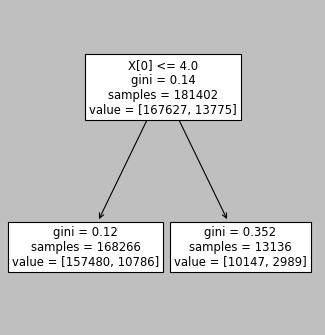

In [12]:
# try different spits based on certain features
X = classification_data[['smart_5_raw', 'smart_5_normalized']]
y = classification_data.fail_30

# X = classification_data.query('smart_5_raw <= 4.0')[['smart_187_normalized', 'smart_187_raw']]
# y = classification_data.query('smart_5_raw <= 4.0').fail_30

# X = classification_data.query('smart_5_raw > 4.0')[['smart_187_normalized', 'smart_187_raw']]
# y = classification_data.query('smart_5_raw > 4.0').fail_30

# X = classification_data.query('smart_5_raw <= 4.0 and smart_187_normalized <= 85.5')[['smart_183_raw', 'smart_183_normalized']]
# y = classification_data.query('smart_5_raw <= 4.0 and smart_187_normalized <= 85.5').fail_30

# X = classification_data.query('smart_5_raw <= 4.0 and smart_187_normalized > 85.5')[['smart_183_raw', 'smart_183_normalized']]
# y = classification_data.query('smart_5_raw <= 4.0 and smart_187_normalized > 85.5').fail_30

# X = classification_data.query('smart_5_raw > 4.0 and smart_187_normalized <= 70.5')[['smart_183_raw', 'smart_183_normalized']]
# y = classification_data.query('smart_5_raw > 4.0 and smart_187_normalized <= 70.5').fail_30

# X = classification_data.query('smart_5_raw > 4.0 and smart_187_normalized > 70.5')[['smart_183_raw', 'smart_183_normalized']]
# y = classification_data.query('smart_5_raw > 4.0 and smart_187_normalized > 70.5').fail_30

# split X and y into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# instantiate and train the tree
tree = DecisionTreeClassifier(max_depth=1, random_state=42)
tree.fit(X_train, y_train)

# plot the tree 
fig = plt.figure(figsize=(5,5))
dectree_plot = plot_tree(tree) 

In [45]:
def baseline_model(df):
    """creates a output of 0 or 1 based on certain features and their respective threshold specified within the function

    Args:
        df (pandas dataframe): takes in the data frame

    Returns:
        list: list containing 0 or 1
    """
    
    y_pred = []

    for a, b in zip(df['smart_5_raw'],df['smart_187_normalized']):
        if a <= 4:
            if b <= 85:
                y_pred.append(1)
            else:
                y_pred.append(0)
        else:
            if b <= 70:
                y_pred.append(1)
            else:
                y_pred.append(0)
            
    return y_pred

In [39]:
def baseline_model_check(df):
    y_pred = [1 if a <= 4 else 0 for a in df['smart_5_raw']]

    return y_pred

In [40]:
# create a list of all column names only containing the smart features
columns = []

for col in classification_data.columns:
    if 'smart' in col:
        columns.append(col)

In [41]:
# split the data into features and target
X = classification_data[columns]
y = classification_data.fail_30

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Scores:
-------------------------
ROC-AUC : 0.6171
Accuracy : 0.8534
Recall   : 0.3384
Precision: 0.2106


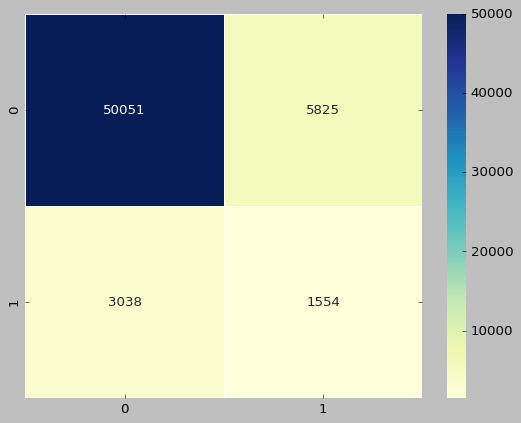

In [46]:
# use the baseline model to predict y_test_pred
y_test_pred = baseline_model(X_test)

# print metric scores
print('Scores:')
print('-------------------------')
print("ROC-AUC : {:.4f}".format(roc_auc_score(y_test, y_test_pred)))
print("Accuracy : {:.4f}".format(accuracy_score(y_test, y_test_pred)))
print("Recall   : {:.4f}".format(recall_score(y_test, y_test_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_test_pred)))

# create the confusion matrix
confusion_matrix(y_test, y_test_pred)

# plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);